<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

#### This dataset is owned by New York City Department of Education. This is the total enrollment count for students whose learning preference is remote or blended or missing and who have attended school in person at least once since September 16, 2020. I am interested in analyzing this dataset because there is a major shift from in-person schooling to remote learning since the Covid-19 phase, and I would like to know real statistics behind it.


The data definition for the columns are as follows:

# Column Name || Column Description ||  Term, Acronym, or Code Definitions

District  **||**  Denotes community school district which school resides **||** District 1-32, 75, 79

disaggregation Category **||** Denotes subcategory breakdown aggregation  **||** All Districts, English Language Learner Status, Gender, Grade Level, Race or Ethnicity

Category  **||**  Denotes subcategory breakdown aggregation  **||**  All Districts, Female, Male, ELL, Not ELL, Grades PK, OK, 1-12th, Asian, Black, Hispanic, Muti Racial, Native American, Unknown, White

Total Enrollment **||**  Denotes total student enrolled count per category

Total Blended  **||**  Total number of students whose learning preferences is blended or missing and who have attended school in person at least once since sept 16, 2020

Percentage Blended  **||**  Percentage of students whose learning preferences is blended or missing and who have attended school in person at least once since sept 16, 2020

Total Remote  **||**  Total number of remote students whose learning preferences is remote or missing and who have not attended school in person at least once since sept 16, 2020

Percentage Remote  **||**  Percentage of remote students whose learning preferences is remote or missing and who have not attended school in person at least once since sept 16, 2020






Data Source: https://catalog.data.gov/dataset/learning-preference-city-remote-learning-as-of-jan-4-2021

About dataset: https://data.cityofnewyork.us/Education/Learning-Preference-City-Remote-Learning-as-of-Jan/k5d2-tkrr

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



### Importing Libraries

#### The first step is to import Pandas and NumPy libraries for data exploration, cleaning and manipulation.

In [38]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
plt.rcParams['figure.figsize'] = (16,12)
warnings.filterwarnings('ignore')

#### Importing CSV data file into pandas dataframe

Defining the path for reading the CSV file. 

Using Pandas "read_csv" function to read the file into Pandas dataframe.

And by passing the limit to view 5 row in the "head() function.

Similarly, viewing the last 5 rows using the "tail()" function.

In [39]:
csv_path = '/content/learning_preference.csv'
learning_df = pd.read_csv(csv_path, encoding="utf-8")
learning_df

,District,Disaggregation Category,Category,# Total Enrollment,# Blended,% Blended,# Remote,% Remote
0,1,All District,All District,10549,"3,035",28.8%,7514,71.2%
1,1,English Language Learner Status,ELL,908,235,25.9%,673,74.1%
2,1,English Language Learner Status,Not ELL,9641,"2,800",29.0%,6841,71.0%
3,1,Gender,Female,5042,"1,455",28.9%,3587,71.1%
4,1,Gender,Male,5507,"1,580",28.7%,3927,71.3%
...,...,...,...,...,...,...,...,...
871,79,Race or Ethnicity,Black,1878,539,28.7%,1339,71.3%
872,79,Race or Ethnicity,Hispanic,2450,642,26.2%,1808,73.8%
873,79,Race or Ethnicity,Multi-Racial,25,5,20.0%,20,80.0%
874,79,Race or Ethnicity,Native American,64,21,32.8%,43,67.2%


In [40]:
learning_df.tail(5)

,District,Disaggregation Category,Category,# Total Enrollment,# Blended,% Blended,# Remote,% Remote
871,79,Race or Ethnicity,Black,1878,539,28.7%,1339,71.3%
872,79,Race or Ethnicity,Hispanic,2450,642,26.2%,1808,73.8%
873,79,Race or Ethnicity,Multi-Racial,25,5,20.0%,20,80.0%
874,79,Race or Ethnicity,Native American,64,21,32.8%,43,67.2%
875,79,Race or Ethnicity,White,359,95,26.5%,264,73.5%


#### Now previewing the data by calling the dataframe using "info()" function and finding the number of cloumns and rows.

This function provides the total number of rows and columns as well as the datatype of each column. 

Also, we are able to see the count of non-null values, which will help us further investigate the missing, or unexpected values in our dataset.

In [41]:
learning_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   District                 876 non-null    int64 
 1   Disaggregation Category  876 non-null    object
 2   Category                 876 non-null    object
 3   # Total Enrollment       876 non-null    int64 
 4   # Blended                876 non-null    object
 5   % Blended                876 non-null    object
 6   # Remote                 876 non-null    object
 7   % Remote                 876 non-null    object
dtypes: int64(2), object(6)
memory usage: 54.9+ KB


### The "shape" method provide the row and column count.

In [42]:
learning_df.shape

(876, 8)

#### Checking the datatype of columns

In [43]:
learning_df.dtypes

District                    int64
Disaggregation Category    object
Category                   object
# Total Enrollment          int64
# Blended                  object
% Blended                  object
# Remote                   object
% Remote                   object
dtype: object

#### Finding the null values in the dataset

In [44]:
for column in learning_df.columns:
    print(f"Column {column} has {learning_df[column].isnull().sum()} null values")

Column District has 0 null values
Column Disaggregation Category has 0 null values
Column Category has 0 null values
Column # Total Enrollment has 0 null values
Column # Blended has 0 null values
Column % Blended has 0 null values
Column # Remote has 0 null values
Column % Remote has 0 null values


#### Finding the missing values in the dataset

In [45]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [46]:
missing_values_table(learning_df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

#### Rename the column names of the dataframe

In [47]:
learning_df.columns

Index(['District', 'Disaggregation Category', 'Category', '# Total Enrollment',
       '# Blended', '% Blended', '# Remote', '% Remote'],
      dtype='object')

In [48]:
learning_df.rename(columns = {'Disaggregation Category':'Disaggregation_Category', '# Total Enrollment':'Total_Enrollment', '# Blended': 'Total_Blended', '% Blended': 'percentage_Blended', '# Remote': 'Total_Remote', '% Remote': 'percentage_Remote'}, inplace = True)
learning_df.columns

Index(['District', 'Disaggregation_Category', 'Category', 'Total_Enrollment',
       'Total_Blended', 'percentage_Blended', 'Total_Remote',
       'percentage_Remote'],
      dtype='object')

#### Convert column names to lower case

In [49]:
# Map the lowering function to all column names
learning_df.columns = map(str.lower, learning_df.columns)
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,"3,035",28.8%,7514,71.2%
1,1,English Language Learner Status,ELL,908,235,25.9%,673,74.1%
2,1,English Language Learner Status,Not ELL,9641,"2,800",29.0%,6841,71.0%
3,1,Gender,Female,5042,"1,455",28.9%,3587,71.1%
4,1,Gender,Male,5507,"1,580",28.7%,3927,71.3%


#### Remove the comma and percentage sign from the column values

In [50]:
# To remove comma from column values in Pandas DataFrame:
learning_df['total_blended'] = learning_df['total_blended'].str.replace(',','')
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8%,7514,71.2%
1,1,English Language Learner Status,ELL,908,235,25.9%,673,74.1%
2,1,English Language Learner Status,Not ELL,9641,2800,29.0%,6841,71.0%
3,1,Gender,Female,5042,1455,28.9%,3587,71.1%
4,1,Gender,Male,5507,1580,28.7%,3927,71.3%


In [51]:
# To remove percentage from column values in Pandas DataFrame:
learning_df['percentage_blended'] = learning_df['percentage_blended'].str.replace('%','')
learning_df['percentage_remote'] = learning_df['percentage_remote'].str.replace('%','')
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8,7514,71.2
1,1,English Language Learner Status,ELL,908,235,25.9,673,74.1
2,1,English Language Learner Status,Not ELL,9641,2800,29.0,6841,71.0
3,1,Gender,Female,5042,1455,28.9,3587,71.1
4,1,Gender,Male,5507,1580,28.7,3927,71.3


#### Convert the "total_blended" and "total_remote" data type from object to integer.

In [ ]:
# Before convert multiple columns to int datatype, we check the values if any character values are there which will block the conversion.
# We found that there is a character "s" in the values which can't be converted to integer. So we will first fix the issue.

learning_df['total_blended'].values.tolist()
learning_df['total_remote'].values.tolist()

#### Replace "s" with 0 in the columns "total_blended" and "total_remote"

In [53]:
learning_df['total_blended'] = learning_df['total_blended'].replace('s', '0') 
learning_df['total_remote'] = learning_df['total_remote'].replace('s', '0')  
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8,7514,71.2
1,1,English Language Learner Status,ELL,908,235,25.9,673,74.1
2,1,English Language Learner Status,Not ELL,9641,2800,29.0,6841,71.0
3,1,Gender,Female,5042,1455,28.9,3587,71.1
4,1,Gender,Male,5507,1580,28.7,3927,71.3


#### Now convert the "total_blended" and "total_remote" object column to integer data type

In [54]:
learning_df['total_blended'] = learning_df['total_blended'].astype(str).astype(int)
learning_df['total_remote'] = learning_df['total_remote'].astype(str).astype(int)
learning_df.dtypes

district                    int64
disaggregation_category    object
category                   object
total_enrollment            int64
total_blended               int64
percentage_blended         object
total_remote                int64
percentage_remote          object
dtype: object

#### Now checking the values of the'percentage_blended' and "percentage_remote" columns.

In [ ]:
learning_df['percentage_blended'].values.tolist()
learning_df['percentage_remote'].values.tolist()

#### Removing the "s" character from the columns so they can be converted from object to integer data type.

In [56]:
learning_df['percentage_blended'] = learning_df['percentage_blended'].replace('s', '0') 
learning_df['percentage_remote'] = learning_df['percentage_remote'].replace('s', '0')  
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,All District,All District,10549,3035,28.8,7514,71.2
1,1,English Language Learner Status,ELL,908,235,25.9,673,74.1
2,1,English Language Learner Status,Not ELL,9641,2800,29.0,6841,71.0
3,1,Gender,Female,5042,1455,28.9,3587,71.1
4,1,Gender,Male,5507,1580,28.7,3927,71.3


#### Now convert the data types of the 'percentage_blended' and 'percentage_remote' columns to integer




In [57]:
learning_df['percentage_blended'] = learning_df['percentage_blended'].astype(str).astype(float)
learning_df['percentage_remote'] = learning_df['percentage_remote'].astype(str).astype(float)
learning_df.dtypes

district                     int64
disaggregation_category     object
category                    object
total_enrollment             int64
total_blended                int64
percentage_blended         float64
total_remote                 int64
percentage_remote          float64
dtype: object

### Convert the dataframe values to all lower case.

In [58]:
# Convert the value of 'Name' column to lowercase
learning_df['disaggregation_category'] = learning_df['disaggregation_category'].map(str.lower)
learning_df['category'] = learning_df['category'].map(str.lower)
learning_df.head()

,district,disaggregation_category,category,total_enrollment,total_blended,percentage_blended,total_remote,percentage_remote
0,1,all district,all district,10549,3035,28.8,7514,71.2
1,1,english language learner status,ell,908,235,25.9,673,74.1
2,1,english language learner status,not ell,9641,2800,29.0,6841,71.0
3,1,gender,female,5042,1455,28.9,3587,71.1
4,1,gender,male,5507,1580,28.7,3927,71.3


#### Checking the duplicates in the dataframe.

In [59]:
learning_df.duplicated().sum()
learning_df.drop_duplicates(inplace=True)
learning_df.shape

(876, 8)

#### Checking the null rows in the dataframe

In [60]:
learning_df.isna().sum()

district                   0
disaggregation_category    0
category                   0
total_enrollment           0
total_blended              0
percentage_blended         0
total_remote               0
percentage_remote          0
dtype: int64

#### Applying GroupBy funtion on the dataframe by "Category"

In [ ]:
enrollment_df = learning_df.groupby("category")["total_enrollment"].sum()
blended_df = learning_df.groupby("category")["total_blended"].sum()
remote_df = learning_df.groupby("category")["total_remote"].sum()
enrollment_df

#### Convert the Groupby to a DataFrame with to_frame()

In [ ]:
enrollment_df = enrollment_df.to_frame()
blended_df = blended_df.to_frame()
remote_df = remote_df.to_frame()
enrollment_df

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



## **Matplotlib Visualizations - Part 1**

In [63]:
enrollment_df

,total_enrollment
category,
01,62138
02,62450
03,64586
04,64945
05,66412
06,65746
07,66577
08,68996
09,77690


In [64]:
blended_df

,total_blended
category,
01,27009
02,26698
03,26339
04,25673
05,25870
06,22891
07,20689
08,21647
09,18274


In [65]:
remote_df

,total_remote
category,
01,35129
02,35752
03,38247
04,39272
05,40542
06,42853
07,45880
08,47349
09,59416


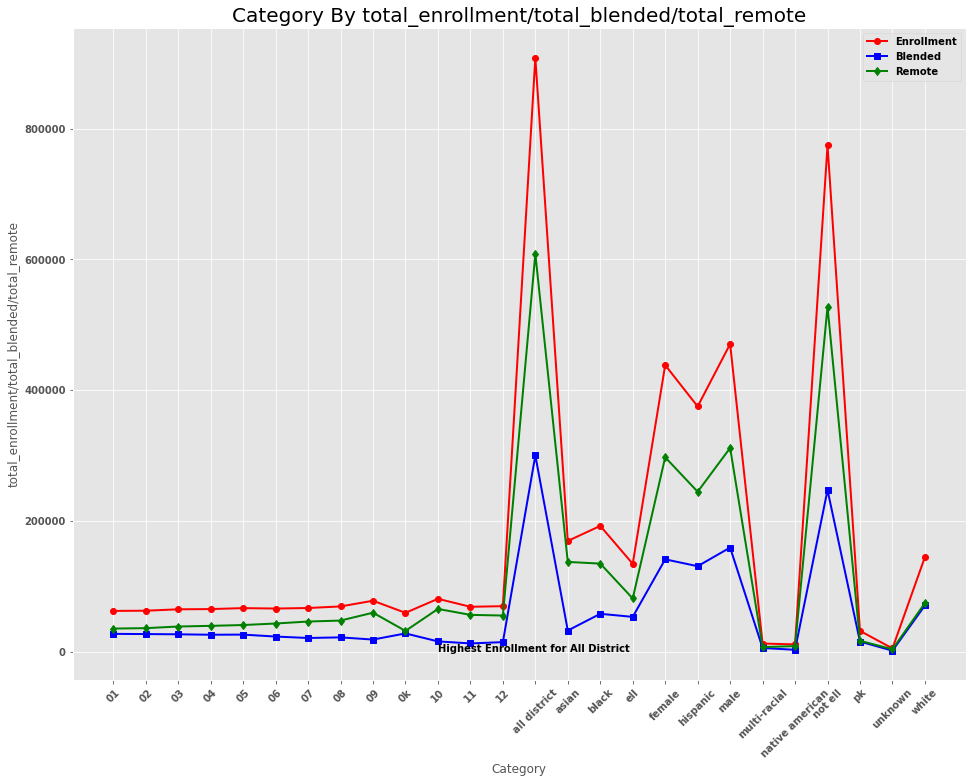

In [66]:


# Use the style ggplot
plt.style.use('ggplot')

# Plot lines
plt.plot(enrollment_df.index, enrollment_df.values, color="red", linewidth=2, linestyle='-', marker='o', label="Enrollment")
plt.plot(blended_df.index, blended_df.values, color="blue", linewidth=2, linestyle='-', marker='s', label="Blended")
plt.plot(remote_df.index, remote_df.values, color="green", linewidth=2, linestyle='-', marker='d', label="Remote")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Category')
plt.ylabel('total_enrollment/total_blended/total_remote')
plt.title('Category By total_enrollment/total_blended/total_remote', fontsize=20)
plt.text(10, 30, "Highest Enrollment for All District")

# Add a legend
plt.legend()

# Display the plot
plt.show()

# **Plot Summary:**

#### The summary for the 'Category By total_enrollment/total_blended/total_remote' plot is as follows:

The summary of ‘Category By total_enrollment/total_blended/total_remote' plot is as follows:

1- This is the data from year 2020. The Total number of all three kind of enrollment (Total, Blended, Remote) is highest for the “All District” Category (community school district where school resides in District 1-32, 75, 79).

2- The second highest is for the “Not ELL (English Language Learners)”.  This shows that there is awareness among not English-speaking people to continue education and interaction.

3- The third highest category is Hispanic.



#### Gropuing by district and calculating the mean of total remote.

In [67]:
avg_remote_df = learning_df.groupby("district")["total_remote"].mean()

avg_blended_df = learning_df.groupby("district")["total_blended"].mean()

avg_remote_df.to_frame()

,total_remote
district,
1,1445.000000
2,7694.038462
3,2276.923077
4,1539.423077
5,1295.000000
6,2572.884615
7,2128.076923
8,3364.807692
9,3885.961538


#### Now creating a scatter plot of average number of remote learner by district.

Text(0.5, 1.0, 'Average Number of Remote by District')

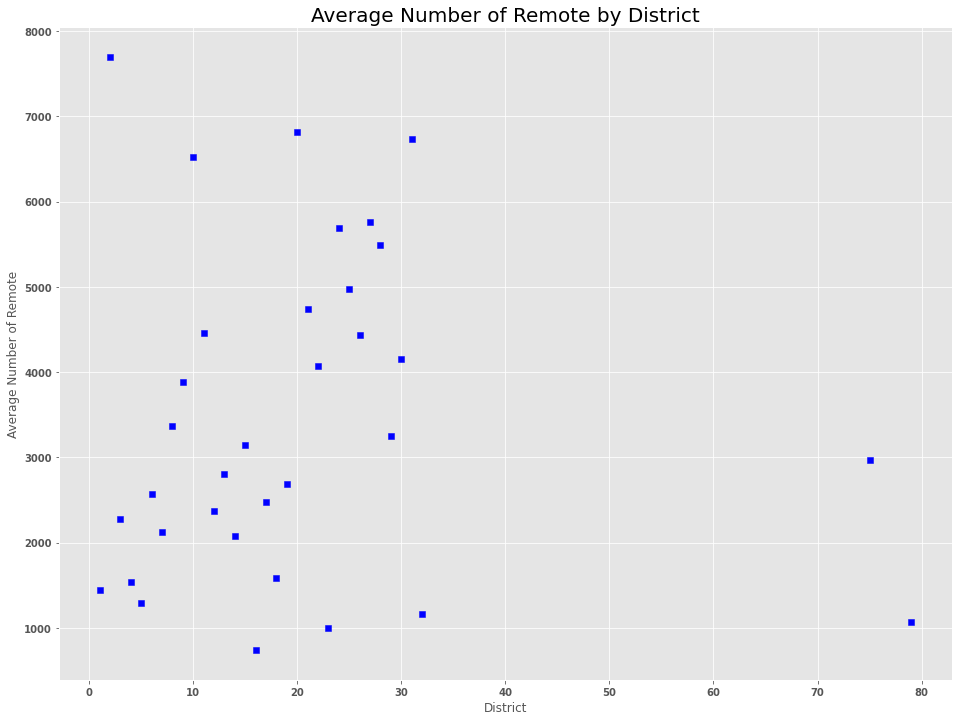

In [68]:
plt.scatter(avg_remote_df.index, avg_remote_df.values, color='blue', marker="s")
plt.xlabel('District')
plt.ylabel('Average Number of Remote')
plt.title('Average Number of Remote Learner by District', fontsize=20)


# **Plot Summary:**

#### The summary of 'Average Number of Remote Learner by District' is as follows.
1-	The average number of remote learners is the highest for the community school district for the Districts 1-32 which is above 6000 enrollment count.

2-	There is no data provided for districts between 33-74.

3-	The average number of remote learners for district 75 and 79 is almost 3000 and 1000 enrollment count respectively.


Text(0.5, 1.0, 'Average Number of Blended by District')

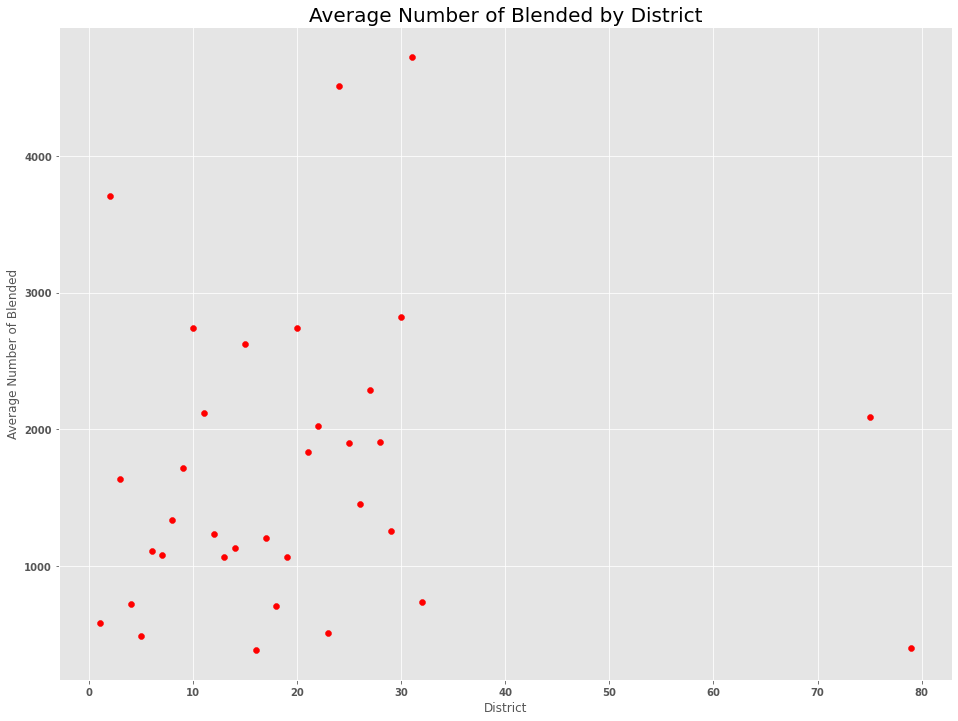

In [69]:
plt.scatter(avg_blended_df.index, avg_blended_df.values, color='red', marker="o")
plt.xlabel('District')
plt.ylabel('Average Number of Blended')
plt.title('Average Number of Blended by District', fontsize=20)


# **Plot Summary:**

#### The summary of 'Average Number of Blended Learner by District' is as follows.
1-	The average number of blended learners is the highest for the community school district for the Districts 1-32 which is below 3000 enrollment count.

2-	There is no data provided for districts between 33-74.

3-	The average number of remote learners for district 75 and 79 is almost 2000 and below 500 enrollment count respectively.


#### Creating a stacked Bar chart for the percentage of reomte and blended learner by Category.

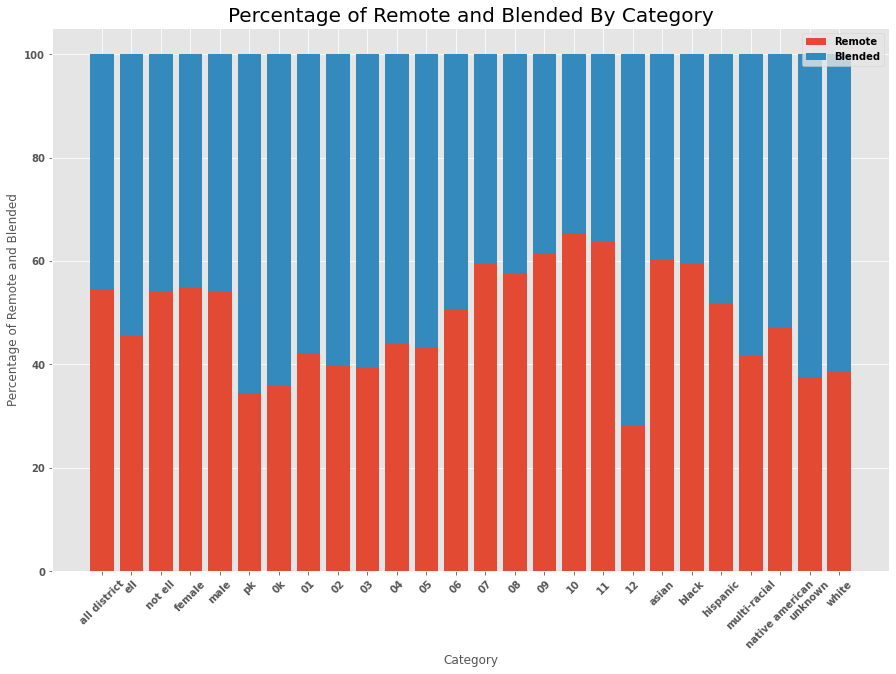

In [71]:
plt.bar(learning_df.category, learning_df.percentage_remote, label="Remote")
plt.bar(learning_df.category, learning_df.percentage_blended, bottom=learning_df.percentage_remote, label="Blended")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Category')
plt.ylabel('Percentage of Remote and Blended')
plt.title('Percentage of Remote and Blended By Category', fontsize=20)
plt.legend()
plt.show()

# **Plot Summary:**

#### The summary for the 'Percentage of Remote and Blended By Category' plot is as follows:
1-	The highest percentage of blended learner is almost 70% for the 12th graders.

2-	Whereas the highest percentage of remote learner is more than 60% for the 10th and 11th graders.



# **Seaborn Visualizations - Part 2**




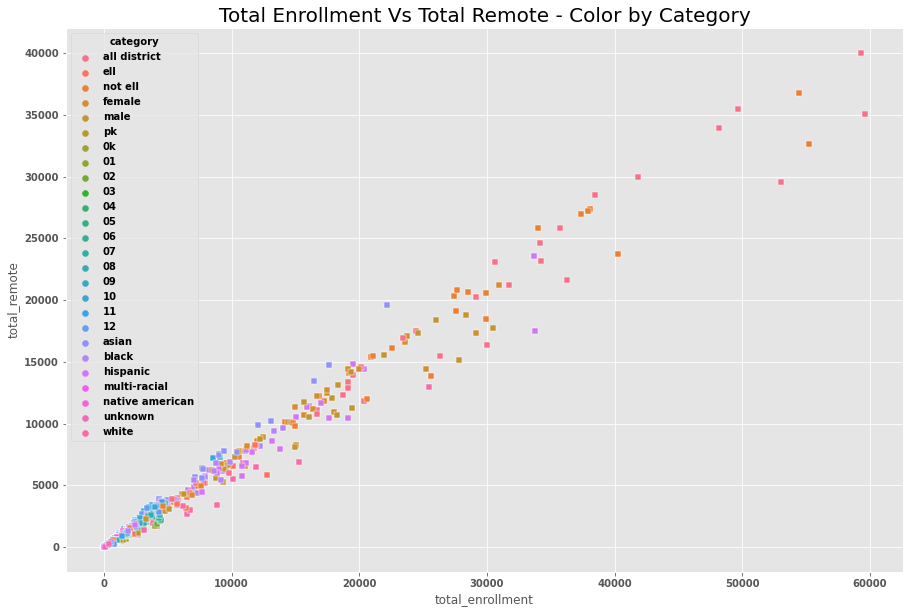

In [77]:
sns.scatterplot('total_enrollment', 'total_remote', data=learning_df, hue="category", marker="s")
plt.title("Total Enrollment Vs Total Remote - Color by Category", fontsize=20)
plt.show()

# **Plot Summary:**

#### The summary for the "Total Enrollment Vs Total Remote - Color by Category" plot is as follows:

1-	The total remote and total enrollment are directly proportional, and among those “All District”, ELL, Not ELL have the highest number of enrollment.

2-	Whereas the high schoolers have the low ratio of enrollment.


# **Heatmap Plot:**
#### Heatmap is a correlation matrix. Pandas DataFrame has a corr method that calculates Pearson's correlation coefficient between all pairs of numeric columns of the DataFrame.

In the heatmap below, each square shows the correlation between the variables on each axis. 

Correlation ranges from -1 to +1. 

If the values are closer to zero then there is no linear trend between the two variables. 

And if the values are closer to one then there is a strong linear trend between the two variables.

The relationship close to +1 means that the variables are positively correlated; as one increases so does the other in positive direction.

The relationship close to -1 means that the variables are negatively correlated; as one increases in positive direction, the other decreases in negative direction.

The light color of the square emphasizes the strength of relationship.

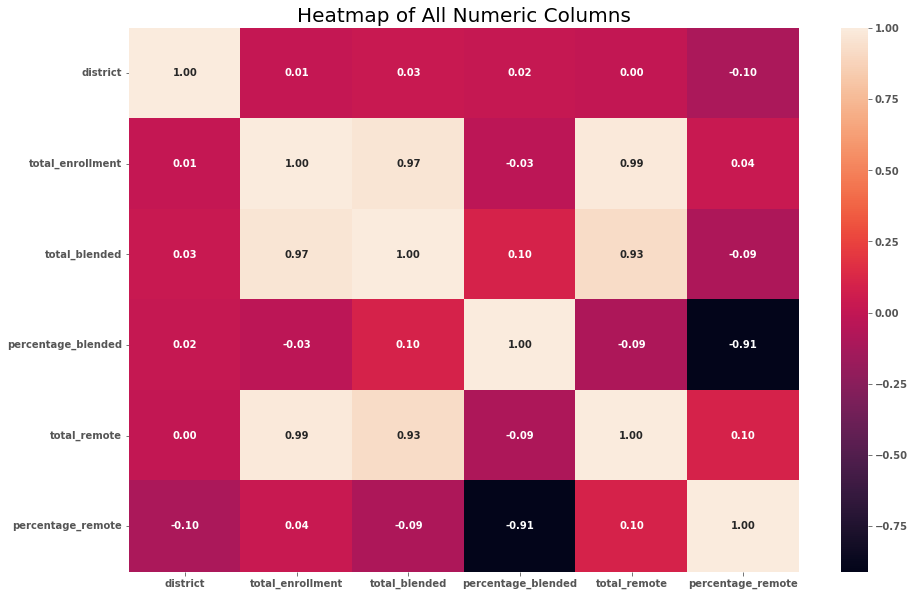

In [73]:
sns.heatmap(learning_df.corr(), annot=True, fmt=".2f")
plt.title("Heatmap of All Numeric Columns", fontsize=20)
plt.show()

# **Plot Summary:**

#### The summary for the "Heat Map" plot is as follows:

1-	The total enrollment and total blended variables have a strong positive relationship of 0.97.

2-	The total enrollment and total remote variables have a strong positive relationship of 0.99.

3-	The total blended and total remote variables have a strong positive relationship of 0.93.

4-	The percentage of remote and percentage of blended have a strong negative relationship of -0.91.


# **Differences Between Creating a Plot in Matplotlib and Seaborn - Part 3**

1- Matplotlib plots the graphs using the Pandas and Numpy whereas Seaborn is the extended version of matplotlib and uses Matplotlib along with Numpy and Pandas library.

2- Matplotlib is easy to implement than Seaborn.

3- Matplotlib uses lengthy code to implement plot whareas seaborn uses less number of code to implement.


# **Conclusions**


1-	This dataset has the total enrollment count for students whose learning preference is remote or blended or missing and who have attended school in person at least once since September 16, 2020, which is the start of Covid-19 phase. 


2-	This dataset has 876 rows and 8 columns.


3-	It required the data cleaning steps like changing column data types, removing the unwanted strings from the column, assigning new column names and etc.


4-	After analyzing the dataset through plots, we found out that the total enrollment and total remote variables have a strong positive correlation of 0.99.


5-	The total remote and total enrollment are directly proportional, and among those “All District”, ELL, Not ELL have the highest number of enrollments.



